# Data Analysis and GIS Storytelling

In this notebook we will explore 311 + ACS Data.

_Note: This is a starter / placeholder file for Felix / Leslie to work on._

## Loading Data from Google Drive

Don't edit this. This is just for loading in all the data.

In [114]:
# Load the Drive helper and mount
from google.colab import drive
import os

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

PROJECT_PATH = "/content/drive/MyDrive/CY PLAN 101 Group # 18: 311 Service Requests/codebase"

os.chdir(PROJECT_PATH)

Mounted at /content/drive


In [115]:
!cp -r "data" "/content/data"

In [116]:
!pip install -r requirements.txt --quiet

# Creating Visualizations

In [117]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns
import pydeck as pdk

In [118]:
#Install to add chart title to html
!pip install folium --quiet
import folium
from folium import Map, Marker
from folium.plugins import TimeSliderChoropleth
from folium.features import DivIcon

In [119]:
# Load 311 service requests and ACS data
serv_req_gdf = gpd.read_parquet('data/processed/serv_req_cleaned.parquet')
sf_tracts_acs = gpd.read_file('data/processed/sf_tracts_cleaned.gpkg')

print("311 Service Requests GeoDataFrame:")
display(serv_req_gdf.head())
print("San Francisco Tracts ACS GeoDataFrame:")
display(sf_tracts_acs.head())

311 Service Requests GeoDataFrame:


,caseid,opened,closed,updated,status,status_notes,responsible_agency,category,request_type,request_details,...,longitude,source,year,month,dow,hour,request_duration_hrs,geometry,is_closed,response_time_cat
0,16753587,2023-05-05 06:11:00,2023-05-05 06:49:39,2023-05-05 06:49:39,Closed,Case Resolved - Pickup Completed.,Recology Abandoned,Street And Sidewalk Cleaning,Bulky Items,Boxed Or Bagged Items,...,-122.420101,Mobile/Open311,2023,5,Friday,6,0.644167,POINT (-122.4201 37.78726),True,<1hr
1,15202335,2022-04-11 09:02:00,2023-01-06 09:11:02,2023-01-06 09:11:02,Closed,Case Resolved - Case Is Resolved,Dpt Signshop Queue,Graffiti,Graffiti On Other Enter Additional Details Below,Other Enter Additional Details Below - Offensive,...,-122.410133,Mobile/Open311,2022,4,Monday,9,6480.150556,POINT (-122.41013 37.78244),True,>3days
2,17060945,2023-07-20 03:20:00,2023-07-20 09:04:16,2023-07-20 09:04:16,Closed,Case Resolved - Pickup Completed.,Recology Abandoned,Street And Sidewalk Cleaning,Bulky Items,Boxed Or Bagged Items,...,-122.419524,Web,2023,7,Thursday,3,5.737778,POINT (-122.41952 37.74619),True,1–24hr
3,17061575,2023-07-20 08:46:00,2023-07-21 08:42:00,2023-07-21 08:42:00,Closed,Case Resolved,Dpw Ops Queue,Street And Sidewalk Cleaning,General Cleaning,Other Loose Garbage,...,-122.409176,Mobile/Open311,2023,7,Thursday,8,23.933333,POINT (-122.40918 37.78372),True,1–24hr
4,13438247,2021-02-01 09:46:48,2023-10-30 10:33:54,2023-10-30 10:33:54,Closed,Case Resolved - This Is A Duplicate Of Rfa#215...,Dpw Bsm Queue,Sidewalk Or Curb,Curb Or Curb Ramp Defect,Curb Or Curb Ramp Defect,...,-122.410576,Web,2021,2,Monday,9,24024.785000,POINT (-122.41058 37.74449),True,>3days


San Francisco Tracts ACS GeoDataFrame:


,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,county,tract,poverty_rate,bachelors_plus_rate,pct_renter_occupied,share_white,share_black,share_asian,share_hispanic,geometry
0,06,075,020602,06075020602,1400000US06075020602,206.02,Census Tract 206.02,G5020,S,246264,...,075,020602,0.062474,0.756133,0.554290,0.756904,0.052060,0.091444,0.099593,"MULTIPOLYGON (((-122.43485 37.75929, -122.4337..."
1,06,075,012202,06075012202,1400000US06075012202,122.02,Census Tract 122.02,G5020,S,94685,...,075,012202,0.286377,0.310496,0.880376,0.393022,0.144891,0.272339,0.189747,"MULTIPOLYGON (((-122.42168 37.7866, -122.42146..."
2,06,075,017102,06075017102,1400000US06075017102,171.02,Census Tract 171.02,G5020,S,294894,...,075,017102,0.076180,0.682438,0.672302,0.758724,0.012526,0.081420,0.147331,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516..."
3,06,075,012302,06075012302,1400000US06075012302,123.02,Census Tract 123.02,G5020,S,92653,...,075,012302,0.225769,0.446382,1.000000,0.442964,0.078684,0.298918,0.179434,"MULTIPOLYGON (((-122.415 37.78745, -122.41335 ..."
4,06,075,016801,06075016801,1400000US06075016801,168.01,Census Tract 168.01,G5020,S,226534,...,075,016801,0.064363,0.673270,0.805208,0.477435,0.061915,0.223170,0.237479,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308..."


In [120]:
# Create a combined Gdf with both geometries to tie individual requests into Census Tracts

joined_Gdf = gpd.sjoin(serv_req_gdf, sf_tracts_acs, how='left', predicate='within')
joined_Gdf.head()

,caseid,opened,closed,updated,status,status_notes,responsible_agency,category,request_type,request_details,...,state,county,tract,poverty_rate,bachelors_plus_rate,pct_renter_occupied,share_white,share_black,share_asian,share_hispanic
0,16753587,2023-05-05 06:11:00,2023-05-05 06:49:39,2023-05-05 06:49:39,Closed,Case Resolved - Pickup Completed.,Recology Abandoned,Street And Sidewalk Cleaning,Bulky Items,Boxed Or Bagged Items,...,06,075,012002,0.169533,0.639614,0.870493,0.276963,0.074869,0.362304,0.285864
1,15202335,2022-04-11 09:02:00,2023-01-06 09:11:02,2023-01-06 09:11:02,Closed,Case Resolved - Case Is Resolved,Dpt Signshop Queue,Graffiti,Graffiti On Other Enter Additional Details Below,Other Enter Additional Details Below - Offensive,...,06,075,012503,0.260997,0.173040,0.995011,0.231373,0.100987,0.347621,0.320018
2,17060945,2023-07-20 03:20:00,2023-07-20 09:04:16,2023-07-20 09:04:16,Closed,Case Resolved - Pickup Completed.,Recology Abandoned,Street And Sidewalk Cleaning,Bulky Items,Boxed Or Bagged Items,...,06,075,025300,0.053580,0.536705,0.484043,0.479037,0.017081,0.122930,0.380952
3,17061575,2023-07-20 08:46:00,2023-07-21 08:42:00,2023-07-21 08:42:00,Closed,Case Resolved,Dpw Ops Queue,Street And Sidewalk Cleaning,General Cleaning,Other Loose Garbage,...,06,075,012503,0.260997,0.173040,0.995011,0.231373,0.100987,0.347621,0.320018
4,13438247,2021-02-01 09:46:48,2023-10-30 10:33:54,2023-10-30 10:33:54,Closed,Case Resolved - This Is A Duplicate Of Rfa#215...,Dpw Bsm Queue,Sidewalk Or Curb,Curb Or Curb Ramp Defect,Curb Or Curb Ramp Defect,...,06,075,025200,0.115865,0.615663,0.313845,0.571541,0.010584,0.130929,0.286946


#Examination of Census Tracts

Interactive Map to Examine Broader Demographic Trends Aross Tracts

In [121]:
tooltip_acs = ['median_household_income', 'poverty_rate', "total_population", "median_home_value"]

acs_discovery_map = sf_tracts_acs.explore(
    column = 'median_household_income',
    cmap = 'RdPu',
    tooltip=tooltip_acs,
    legend = True,
    legend_kwds={
        "caption": "Median Household Income ($)"
    }
)

title_discovery_map = '''
     <h3 align="center" style="font-size:20px"><b>Median Household Income by Census Tract, San Francisco 2023</b></h3>
'''

acs_discovery_map.get_root().html.add_child(folium.Element(title_discovery_map))
acs_discovery_map
#acs_discovery_map.save("acs_discovery_map.html")

# Types of Requests by Census Tract and Income

Figure 1: street + sidewalk cleaning requests that are opened and closed in 2023 timescale (2023) per capita per tract and associated graphs (such as relationship between requests per capita and income per tract)

Figure 2: Most popular type of request by tract map + stacked bar perhaps?

In [122]:
#Find the top categories of requests to consolidate smaller categories as "Other"

req_type_counts = joined_Gdf['category'].value_counts()
top_categories = req_type_counts.index[0:5].tolist()
top_categories


['Street And Sidewalk Cleaning',
 'Graffiti',
 'Parking Enforcement',
 'Encampments',
 'General Request - Public Works']

In [123]:
#Recode to just top categories
joined_Gdf['top_categories'] = joined_Gdf['category'].where(joined_Gdf['category'].isin(top_categories), other = 'Other')

In [124]:
requests_counts = joined_Gdf.groupby(['TRACTCE', 'top_categories']).size().unstack(fill_value = 0)
# Add group by month for some type of time dimension
tract_requests_total = requests_counts.sum(axis = 1)

requests_counts_pct = 100*requests_counts.div(tract_requests_total, axis = 0)
top_category = requests_counts.idxmax(axis = 1)

requests_Gdf = sf_tracts_acs
requests_Gdf = requests_Gdf.merge(top_category.rename('top request category'), left_on = 'TRACTCE', right_on = 'TRACTCE')
requests_Gdf = requests_Gdf.merge(requests_counts, left_on = 'TRACTCE', right_on = 'TRACTCE')
requests_Gdf.head()


,STATEFP,COUNTYFP,TRACTCE,GEOID,GEOIDFQ,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,...,share_asian,share_hispanic,geometry,top request category,Encampments,General Request - Public Works,Graffiti,Other,Parking Enforcement,Street And Sidewalk Cleaning
0,06,075,020602,06075020602,1400000US06075020602,206.02,Census Tract 206.02,G5020,S,246264,...,0.091444,0.099593,"MULTIPOLYGON (((-122.43485 37.75929, -122.4337...",Parking Enforcement,11,46,134,306,354,328
1,06,075,012202,06075012202,1400000US06075012202,122.02,Census Tract 122.02,G5020,S,94685,...,0.272339,0.189747,"MULTIPOLYGON (((-122.42168 37.7866, -122.42146...",Street And Sidewalk Cleaning,610,105,808,402,184,2382
2,06,075,017102,06075017102,1400000US06075017102,171.02,Census Tract 171.02,G5020,S,294894,...,0.081420,0.147331,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516...",Street And Sidewalk Cleaning,91,256,1215,1071,617,2592
3,06,075,012302,06075012302,1400000US06075012302,123.02,Census Tract 123.02,G5020,S,92653,...,0.298918,0.179434,"MULTIPOLYGON (((-122.415 37.78745, -122.41335 ...",Street And Sidewalk Cleaning,212,113,309,632,386,2580
4,06,075,016801,06075016801,1400000US06075016801,168.01,Census Tract 168.01,G5020,S,226534,...,0.223170,0.237479,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308...",Street And Sidewalk Cleaning,118,134,1303,759,761,2672


In [125]:
#Creating the visualization of top request category by census tract

tooltip_cols2 = ['median_household_income', 'poverty_rate'] + list(requests_counts.columns)

request_source_map = requests_Gdf.explore(
    column = 'top request category',
    cmap = 'rainbow',
    tooltip=tooltip_cols2,
    legend = True,
    legend_kwds={
        "caption": "Request Category"
    }
)

title_request_source_map = '''
     <h3 align="center" style="font-size:20px"><b>Top 311 Request Types by Census Tract, San Francisco 2023</b></h3>
'''

request_source_map.get_root().html.add_child(folium.Element(title_request_source_map))
request_source_map

#request_source_map.save("request_source_map.html")

In [126]:
# Creating the income buckets for the stacked bar

income_bins = [0, 75000, 100000, 125000, 150000, 175000, 200000, float('inf')]
income_labels = ['<75K', '75K-100K', '100K-125K', '125K-150K', '150K-175K', '175K-200K', '200K+']
requests_Gdf['income_bucket'] = pd.cut(requests_Gdf['median_household_income'],
                                       bins=income_bins, labels=income_labels)

In [127]:
# Grouping and finding percentage splits of requests by income group

inc_grouped = requests_Gdf.groupby('income_bucket')[list(requests_counts.columns)].sum()
inc_grouped_pct = inc_grouped.div(inc_grouped.sum(axis=1), axis=0)

/tmp/ipython-input-3108520957.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  inc_grouped = requests_Gdf.groupby('income_bucket')[list(requests_counts.columns)].sum()


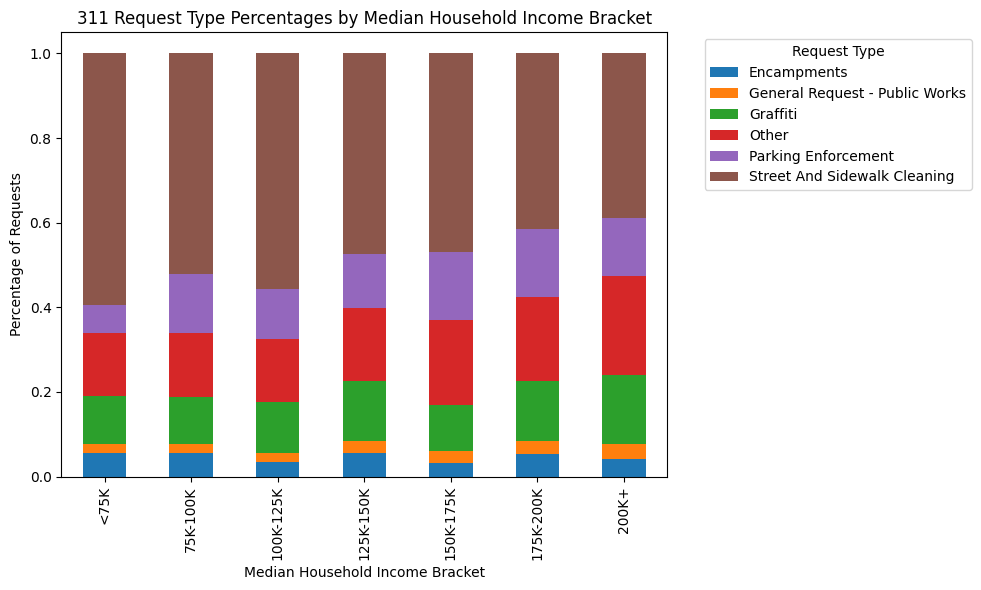

In [128]:
fig, ax = plt.subplots(figsize=(10, 6))

inc_grouped_pct.plot(kind='bar', stacked=True, ax=ax)
plt.ylabel("Percentage of Requests")
plt.xlabel("Median Household Income Bracket")
plt.title("311 Request Type Percentages by Median Household Income Bracket")
plt.legend(title="Request Type", bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()
#plt.savefig('request_type_stacked_bar.jpeg')

# Sidewalk and Street Cleaning Requests per Capita by Census Tract


Scatterplot of Median HH income and per capita requests

Median response time by census tract income

In [129]:
#Filtering for the most common category of 311 requests, Street and Sidewalk Cleaning
#Cleaning and organizing data for mapping

street_clean_gdf = joined_Gdf[joined_Gdf['category'] == 'Street And Sidewalk Cleaning']
street_clean_gdf = street_clean_gdf[street_clean_gdf['status'] == 'Closed']
street_clean_gdf['open_close_timeframe'] = street_clean_gdf['closed'] - street_clean_gdf['opened']
street_clean_gdf['Month'] = street_clean_gdf['closed'].dt.to_period('M')
street_clean_gdf.head()

,caseid,opened,closed,updated,status,status_notes,responsible_agency,category,request_type,request_details,...,poverty_rate,bachelors_plus_rate,pct_renter_occupied,share_white,share_black,share_asian,share_hispanic,top_categories,open_close_timeframe,Month
0,16753587,2023-05-05 06:11:00,2023-05-05 06:49:39,2023-05-05 06:49:39,Closed,Case Resolved - Pickup Completed.,Recology Abandoned,Street And Sidewalk Cleaning,Bulky Items,Boxed Or Bagged Items,...,0.169533,0.639614,0.870493,0.276963,0.074869,0.362304,0.285864,Street And Sidewalk Cleaning,0 days 00:38:39,2023-05
2,17060945,2023-07-20 03:20:00,2023-07-20 09:04:16,2023-07-20 09:04:16,Closed,Case Resolved - Pickup Completed.,Recology Abandoned,Street And Sidewalk Cleaning,Bulky Items,Boxed Or Bagged Items,...,0.053580,0.536705,0.484043,0.479037,0.017081,0.122930,0.380952,Street And Sidewalk Cleaning,0 days 05:44:16,2023-07
3,17061575,2023-07-20 08:46:00,2023-07-21 08:42:00,2023-07-21 08:42:00,Closed,Case Resolved,Dpw Ops Queue,Street And Sidewalk Cleaning,General Cleaning,Other Loose Garbage,...,0.260997,0.173040,0.995011,0.231373,0.100987,0.347621,0.320018,Street And Sidewalk Cleaning,0 days 23:56:00,2023-07
6,16736674,2023-05-01 07:55:00,2023-05-02 10:41:00,2023-05-02 10:41:00,Closed,Case Resolved,Dpw Ops Queue,Street And Sidewalk Cleaning,Hazardous Materials,Glass,...,0.077258,0.433405,0.264754,0.350785,0.012011,0.450878,0.186326,Street And Sidewalk Cleaning,1 days 02:46:00,2023-05
12,17052207,2023-07-18 06:55:00,2023-07-18 07:14:24,2023-07-18 07:14:24,Closed,Case Resolved - Pickup Completed.,Recology Abandoned,Street And Sidewalk Cleaning,Bulky Items,Furniture,...,0.089945,0.536308,0.241558,0.416429,0.054159,0.371081,0.158331,Street And Sidewalk Cleaning,0 days 00:19:24,2023-07


In [130]:
annual_tract_counts = street_clean_gdf.groupby(['TRACTCE']).size().reset_index(name='request_count')
annual_tract_counts = annual_tract_counts.merge(sf_tracts_acs[['TRACTCE', 'total_population', 'median_household_income', 'poverty_rate', 'geometry', 'share_white', 'share_black', 'share_hispanic']], on = 'TRACTCE', how = 'left')
annual_tract_counts = annual_tract_counts[annual_tract_counts['total_population'] > 0]
annual_tract_counts['req_per_capita'] = 100*annual_tract_counts['request_count']/annual_tract_counts['total_population']
annual_counts_Gdf = gpd.GeoDataFrame(annual_tract_counts, geometry='geometry', crs=sf_tracts_acs.crs)
annual_counts_Gdf = annual_counts_Gdf[annual_counts_Gdf['total_population'] > 1000]

In [131]:
# Making map for sidewalk & street cleaning requests per 100 residents by census tract

tooltip_counts = ['req_per_capita', 'total_population', 'median_household_income', 'poverty_rate']

ss_counts_map = annual_counts_Gdf.explore(
    column = 'req_per_capita',
    cmap = 'RdYlGn',
    tooltip=tooltip_counts,
    legend = True,
    legend_kwds={
        "caption": "Requests per 100 Residents"
    }
)

title_ss_counts_map = '''
     <h3 align="center" style="font-size:20px"><b>Sidewalk & Street Cleaning Requests per 100 Residents by Census Tract</b></h3>
'''

ss_counts_map.get_root().html.add_child(folium.Element(title_ss_counts_map))
ss_counts_map

#ss_counts_map.save("ss_cleaning_map.html")

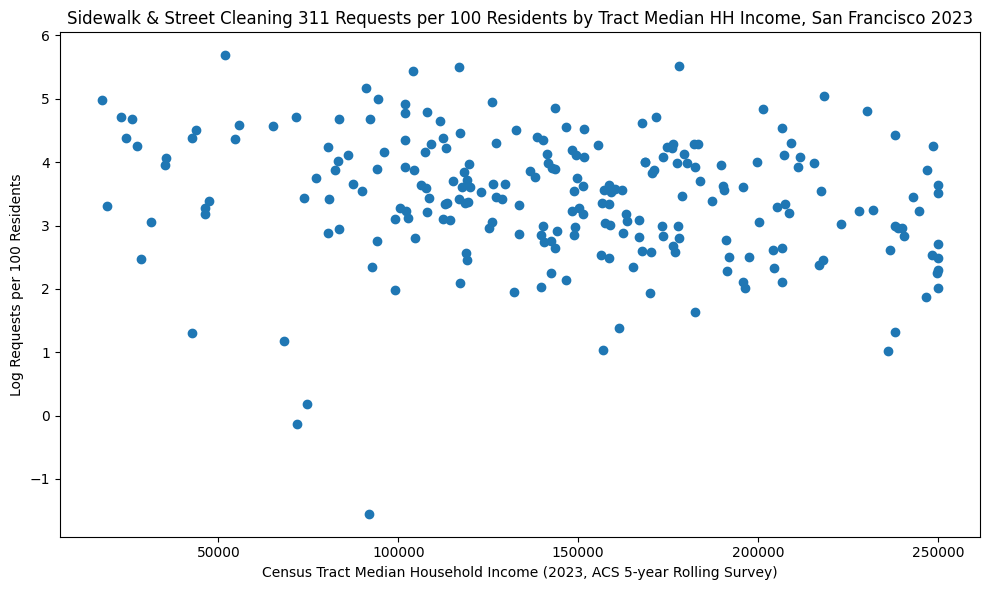

In [132]:
#scatterplot to show the relationship between income and number of requests per capita

import numpy as np
fig, ax = plt.subplots(figsize=(10,6))

x = annual_counts_Gdf['median_household_income']
y = np.log(annual_counts_Gdf['req_per_capita'])

plt.scatter(x, y)

'''
m, b = np.polyfit(x, y, 1)
trend = m * x + b

plt.plot(x, trend)
'''

plt.ylabel("Log Requests per 100 Residents")
plt.xlabel("Census Tract Median Household Income (2023, ACS 5-year Rolling Survey)")
plt.title("Sidewalk & Street Cleaning 311 Requests per 100 Residents by Tract Median HH Income, San Francisco 2023")
plt.tight_layout()
plt.show()
#plt.savefig('Cleaning_request_scatterplot.jpeg')

# Graveyard

Ideas in progress, to be potentially revisited later

In [133]:
# Create the monthly slider for sidewalk & street cleaning map -- to be done later

'''
monthly_tract_counts = street_clean_gdf.groupby(['TRACTCE', 'Month']).size().reset_index(name='request_count')
monthly_tract_counts = monthly_tract_counts.merge(sf_tracts_acs[['TRACTCE', 'total_population', 'median_household_income', 'poverty_rate', 'geometry']], on = 'TRACTCE', how = 'left')
monthly_tract_counts = monthly_tract_counts[monthly_tract_counts['total_population'] > 0]
monthly_tract_counts['req_per_capita'] = 1000*monthly_tract_counts['request_count']/monthly_tract_counts['total_population']
monthly_counts_Gdf = gpd.GeoDataFrame(monthly_tract_counts, geometry='geometry', crs=sf_tracts_acs.crs)
monthly_counts_Gdf['month_str'] = monthly_counts_Gdf['Month'].astype(str)
monthly_counts_Gdf
'''

"\nmonthly_tract_counts = street_clean_gdf.groupby(['TRACTCE', 'Month']).size().reset_index(name='request_count')\nmonthly_tract_counts = monthly_tract_counts.merge(sf_tracts_acs[['TRACTCE', 'total_population', 'median_household_income', 'poverty_rate', 'geometry']], on = 'TRACTCE', how = 'left')\nmonthly_tract_counts = monthly_tract_counts[monthly_tract_counts['total_population'] > 0]\nmonthly_tract_counts['req_per_capita'] = 1000*monthly_tract_counts['request_count']/monthly_tract_counts['total_population']\nmonthly_counts_Gdf = gpd.GeoDataFrame(monthly_tract_counts, geometry='geometry', crs=sf_tracts_acs.crs)\nmonthly_counts_Gdf['month_str'] = monthly_counts_Gdf['Month'].astype(str)\nmonthly_counts_Gdf\n"

In [134]:
#Examining the top sources of 311 requests across census tracts
'''source_counts = joined_Gdf.groupby(['TRACTCE', 'source']).size().unstack(fill_value = 0)
tract_source_total = source_counts.sum(axis = 1)
source_pct = 100*source_counts.div(tract_source_total, axis = 0)

top_source_tract = source_counts.idxmax(axis = 1)
top_intensity_tract = source_pct.max(axis = 1)

sources_Gdf = sf_tracts_acs
sources_Gdf = sources_Gdf.merge(top_intensity_tract.rename('top intensity'), left_on = 'TRACTCE', right_on = 'TRACTCE')
sources_Gdf = sources_Gdf.merge(top_source_tract.rename('top source'), left_on = 'TRACTCE', right_on = 'TRACTCE')
sources_Gdf = sources_Gdf.merge(source_counts, left_on = 'TRACTCE', right_on = 'TRACTCE')
sources_Gdf.head()
'''

"source_counts = joined_Gdf.groupby(['TRACTCE', 'source']).size().unstack(fill_value = 0)\ntract_source_total = source_counts.sum(axis = 1)\nsource_pct = 100*source_counts.div(tract_source_total, axis = 0)\n\ntop_source_tract = source_counts.idxmax(axis = 1)\ntop_intensity_tract = source_pct.max(axis = 1)\n\nsources_Gdf = sf_tracts_acs\nsources_Gdf = sources_Gdf.merge(top_intensity_tract.rename('top intensity'), left_on = 'TRACTCE', right_on = 'TRACTCE')\nsources_Gdf = sources_Gdf.merge(top_source_tract.rename('top source'), left_on = 'TRACTCE', right_on = 'TRACTCE')\nsources_Gdf = sources_Gdf.merge(source_counts, left_on = 'TRACTCE', right_on = 'TRACTCE')\nsources_Gdf.head()\n"

In [135]:
'''
source_colors = {
    'Mobile/Open311': 'Greens',
    'Phone': 'Blues',
    'Web': 'Yellows',
    'Integrated Agency': 'Reds'
}
'''

"\nsource_colors = {\n    'Mobile/Open311': 'Greens',\n    'Phone': 'Blues',\n    'Web': 'Yellows',\n    'Integrated Agency': 'Reds'\n}\n"

In [136]:
'''
tooltip_cols = list(source_counts.columns) + ['top source', 'top intensity']

m = sources_Gdf.explore(
    column = 'top intensity',
    cmap = 'Blues',
    tooltip=tooltip_cols,
    legend = True,
)

m
'''

"\ntooltip_cols = list(source_counts.columns) + ['top source', 'top intensity']\n\nm = sources_Gdf.explore(\n    column = 'top intensity',\n    cmap = 'Blues',\n    tooltip=tooltip_cols,\n    legend = True,\n)\n\nm\n"